In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Set the file path of the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/j17.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Print the first five rows of the DataFrame
print(df.head())



Mounted at /content/drive
       Date  WaterLevelElevation
0  4/9/2023               638.52
1  4/8/2023               638.13
2  4/7/2023               636.97
3  4/6/2023               635.76
4  4/5/2023               634.96


In [2]:
df.head()

,Date,WaterLevelElevation
0,4/9/2023,638.52
1,4/8/2023,638.13
2,4/7/2023,636.97
3,4/6/2023,635.76
4,4/5/2023,634.96


In [3]:
# Check for null values in the "Discharge" column
null_count = df['WaterLevelElevation'].isnull().sum()

# Print the number of null values in the "Discharge" column
print(f"The 'WaterLevelElevation' column has {null_count} null values.")

The 'WaterLevelElevation' column has 0 null values.


In [ ]:
# Fill missing values in the "WaterLevelElevation" column using linear interpolation
#df['Filled_values'] = df['WaterLevelElevation'].interpolate()

In [ ]:
df.head()

,Date,WaterLevelElevation
0,4/9/2023,638.52
1,4/8/2023,638.13
2,4/7/2023,636.97
3,4/6/2023,635.76
4,4/5/2023,634.96


In [ ]:
#df = df.drop('WaterLevelElevation', axis=1)

In [ ]:
##df = df.rename(columns={'Filled_values': 'WaterLevelElevation'})

In [4]:
# split the data into train and test sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size, :]
test_data = df.iloc[train_size:, :]

In [5]:
#df.head()

In [6]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data['WaterLevelElevation'].values.reshape(-1,1))


In [7]:
# create sequences of data for LSTM
X_train = []
y_train = []
lookback = 10  # number of time steps to look back
for i in range(lookback, train_size):
    X_train.append(train_data_scaled[i-lookback:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [9]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32,shuffle=False, validation_split=0.2)

Epoch 1/20
645/645 [==============================] - 23s 21ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 2/20
645/645 [==============================] - 13s 20ms/step - loss: 0.0012 - val_loss: 9.5521e-04
Epoch 3/20
645/645 [==============================] - 13s 19ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/20
645/645 [==============================] - 11s 17ms/step - loss: 0.0011 - val_loss: 9.0710e-04
Epoch 5/20
645/645 [==============================] - 13s 20ms/step - loss: 9.9080e-04 - val_loss: 5.6702e-04
Epoch 6/20
645/645 [==============================] - 13s 20ms/step - loss: 8.1838e-04 - val_loss: 3.7046e-04
Epoch 7/20
645/645 [==============================] - 12s 18ms/step - loss: 5.9669e-04 - val_loss: 2.8327e-04
Epoch 8/20
645/645 [==============================] - 12s 19ms/step - loss: 3.3840e-04 - val_loss: 1.7726e-04
Epoch 9/20
645/645 [==============================] - 14s 21ms/step - loss: 1.7229e-04 - val_loss: 6.7768e-05
Epoch 10/20
645/645 [=============

In [10]:
# get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

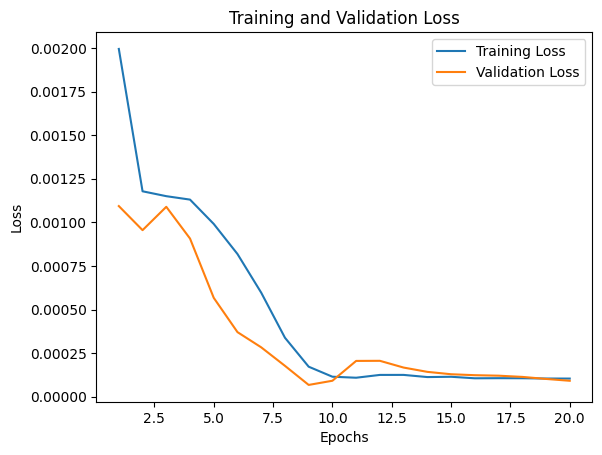

In [13]:
# plot training and validation loss over epochs
epochs = range(1, len(train_loss) + 1)
import matplotlib.pyplot as plt
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# prepare the test data
inputs = df['WaterLevelElevation'][len(df) - len(test_data) - lookback:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)


In [15]:
# create test sequences
X_test = []
for i in range(lookback, len(test_data)+lookback):
    X_test.append(inputs[i-lookback:i,0])
X_test = np.array(X_test)

In [16]:
# reshape test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# predict the test data
predicted_data_scaled = model.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data_scaled)


202/202 [==============================] - 3s 8ms/step


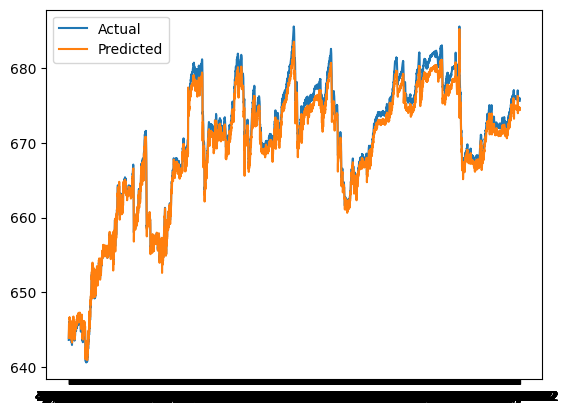

In [17]:
# plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.plot(test_data['Date'], test_data['WaterLevelElevation'], label='Actual')
plt.plot(test_data['Date'], predicted_data, label='Predicted')
plt.legend()
plt.show()

In [18]:
import plotly.graph_objects as go



# create plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_data['Date'], y=test_data['WaterLevelElevation'], name='Actual'))
fig.add_trace(go.Scatter(x=test_data['Date'], y=predicted_data.flatten(), name='Predicted'))
fig.update_layout(title='Water Level Elevation Prediction', xaxis_title='Date', yaxis_title='Water Level Elevation')
fig.show()


In [19]:
import plotly.graph_objects as go

# create plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data['Date'], y=train_data['WaterLevelElevation'], name='Historical WaterLevelElevation'))
fig.add_trace(go.Scatter(x=test_data['Date'], y=test_data['WaterLevelElevation'], name='Actual DiWaterLevelElevationscharge'))
fig.add_trace(go.Scatter(x=test_data['Date'], y=predicted_data.flatten(), name='Predicted WaterLevelElevation'))


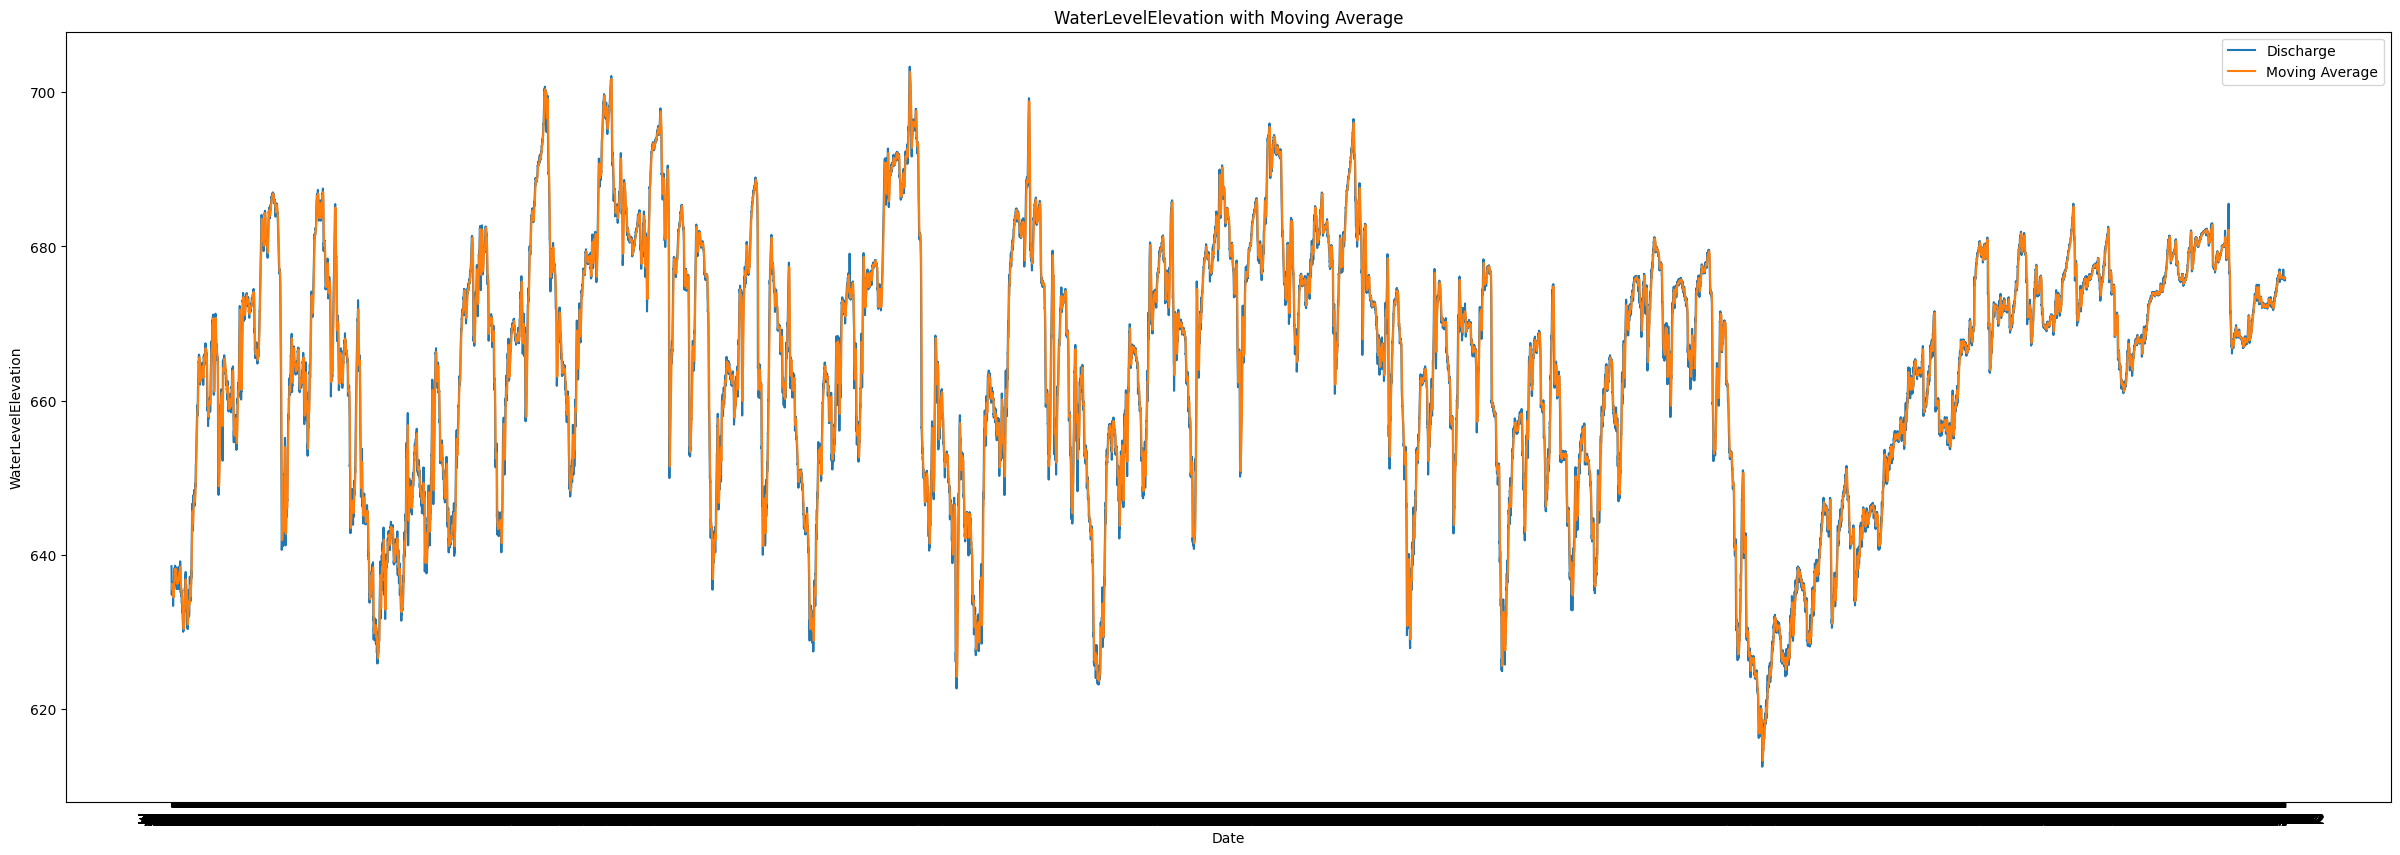

In [21]:
import matplotlib.pyplot as plt

# calculate rolling mean with window of 10
rolling_mean = df['WaterLevelElevation'].rolling(window=10).mean()

# plot original data and rolling mean
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df['Date'], df['WaterLevelElevation'], label='Discharge')
ax.plot(df['Date'], rolling_mean, label='Moving Average')
ax.set(title='WaterLevelElevation with Moving Average', xlabel='Date', ylabel='WaterLevelElevation')
ax.legend()

plt.show()